### Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
cars_df = pd.read_csv( "https://drive.google.com/uc?export=download&id=1V_VBbyjGj6vvD0A90S5Lk0DG90djz28B" )

In [3]:
cars_df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_new,engine_new,power_new,age,make,model,KM_Driven
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,1199,88.70,9,honda,jazz,46
1,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,1248,88.76,8,maruti,ertiga,87
2,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,23.08,1461,63.10,7,nissan,micra,86
3,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95,22.30,1248,74.00,8,tata,indica,65
4,Maruti Swift VDI BSIV,Jaipur,2015,64424,Diesel,Manual,First,25.2 kmpl,1248 CC,74 bhp,5.0,NaN,5.60,25.20,1248,74.00,5,maruti,swift,64


In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3092 non-null   object 
 1   Location           3092 non-null   object 
 2   Year               3092 non-null   int64  
 3   Kilometers_Driven  3092 non-null   int64  
 4   Fuel_Type          3092 non-null   object 
 5   Transmission       3092 non-null   object 
 6   Owner_Type         3092 non-null   object 
 7   Mileage            3092 non-null   object 
 8   Engine             3092 non-null   object 
 9   Power              3092 non-null   object 
 10  Seats              3091 non-null   float64
 11  New_Price          411 non-null    object 
 12  Price              3092 non-null   float64
 13  mileage_new        3092 non-null   float64
 14  engine_new         3092 non-null   int64  
 15  power_new          3092 non-null   float64
 16  age                3092 

### Feature Set Selection

In [5]:
cars_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'mileage_new', 'engine_new', 'power_new', 'age',
       'make', 'model', 'KM_Driven'],
      dtype='object')

In [6]:
x_columns = ['KM_Driven', 'Fuel_Type', 'age',
              'Transmission', 'Owner_Type', 'Seats',
              'make', 'mileage_new', 'engine_new', 'model',
              'power_new', 'Location']
## model of the car is not included in the model

In [7]:
cat_features = ['Fuel_Type',
                'Transmission', 'Owner_Type', 'model',
                'make', 'Location']

In [8]:
num_features = list(set(x_columns) - set(cat_features))

In [9]:
num_features

['mileage_new', 'power_new', 'KM_Driven', 'Seats', 'age', 'engine_new']

In [10]:
cars_df[x_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KM_Driven     3092 non-null   int64  
 1   Fuel_Type     3092 non-null   object 
 2   age           3092 non-null   int64  
 3   Transmission  3092 non-null   object 
 4   Owner_Type    3092 non-null   object 
 5   Seats         3091 non-null   float64
 6   make          3092 non-null   object 
 7   mileage_new   3092 non-null   float64
 8   engine_new    3092 non-null   int64  
 9   model         3092 non-null   object 
 10  power_new     3092 non-null   float64
 11  Location      3092 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 290.0+ KB


### Encode Categorical Variables

In [11]:
encoded_cars_df = pd.get_dummies(cars_df[x_columns],
                                 columns=cat_features)

In [12]:
encoded_cars_df.sample(5)

,KM_Driven,age,Seats,mileage_new,engine_new,power_new,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
2591,32,4,5.0,16.20,1199,74.00,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False
1362,68,12,5.0,17.92,1086,62.10,False,True,False,True,...,False,False,False,False,True,False,False,False,False,False
521,29,7,5.0,18.90,1197,82.00,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
2323,17,3,5.0,22.50,998,67.00,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False
2419,40,2,5.0,20.14,1197,81.86,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True


In [13]:
x_features = list(encoded_cars_df.columns)

In [14]:
encoded_cars_df.shape

(3092, 143)

### Setting X and y variables

In [15]:
X = encoded_cars_df
X['Price'] = cars_df['Price']

### Data Splitting

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train, test = train_test_split(X,train_size = 0.8,random_state = 100)

In [18]:
train.shape

(2473, 144)

In [19]:
train[0:10]

,KM_Driven,age,Seats,mileage_new,engine_new,power_new,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,...,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Price
2953,60,6,5.0,20.45,1461,83.80,True,False,False,True,...,False,False,False,False,True,False,False,False,False,6.00
716,42,5,5.0,18.60,1197,81.83,False,True,False,True,...,False,False,False,False,False,False,False,True,False,5.05
250,31,3,5.0,20.40,1197,81.80,False,True,False,True,...,False,False,False,False,False,True,False,False,False,5.75
1505,62,6,5.0,22.07,1199,73.90,True,False,False,True,...,False,False,True,False,False,False,False,False,False,4.25
859,169,5,7.0,14.95,2489,93.70,True,False,False,True,...,False,False,False,True,False,False,False,False,False,5.00
3002,55,4,5.0,19.87,1461,83.80,True,False,False,True,...,False,False,False,False,False,False,False,False,True,7.80
2273,57,7,5.0,21.10,814,55.20,False,True,False,True,...,False,False,False,False,False,True,False,False,False,3.84
2347,80,5,5.0,20.14,1498,88.80,True,False,False,True,...,False,False,False,True,False,False,False,False,False,5.80
332,100,10,5.0,20.00,1399,68.00,True,False,False,True,...,False,False,False,False,True,False,False,False,False,1.28
329,36,4,5.0,21.10,814,55.20,False,True,False,True,...,False,False,False,False,False,True,False,False,False,4.38


In [20]:
test.shape

(619, 144)

## Finding the best model

Using H2O AutoML Library

Details: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/downloading.html?_ga=2.37321956.534948750.1625291360-92496293.1624088300

In [21]:
# Installing H2O dependencies
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [22]:
# Installing H2O
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=1b7c7c5f99eb6f1aec8f2b2f83ce4cb58cb705fa6f3c9d20577cffec2040e3b0
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


In [23]:
import h2o
from h2o.automl import H2OAutoML

In [24]:
## prepare data
h2o.init()

h2o_train = h2o.H2OFrame(train)
h2o_test = h2o.H2OFrame(test)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpp5m0y099
  JVM stdout: /tmp/tmpp5m0y099/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpp5m0y099/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_lm7xif
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

In [25]:
aml = H2OAutoML(max_models=10,
                seed=1,
                stopping_metric='MSE',
                sort_metric='MSE',
                max_runtime_secs = 300,
                exclude_algos = ["GLM", "DeepLearning"])

aml.train(x=x_features,
          y='Price',
          training_frame=h2o_train)
#XRT - Extremely Randomized Trees

AutoML progress: |
06:20:50.67: _train param, Dropping bad and constant columns: [model_fusion, model_classic, model_thar, make_ambassador, model_platinum]

████████
06:21:25.614: _train param, Dropping bad and constant columns: [model_fusion, model_classic, model_thar, make_ambassador, model_platinum]

███████
06:21:59.909: _train param, Dropping bad and constant columns: [model_fusion, model_classic, model_thar, make_ambassador, model_platinum]

████
06:22:18.672: _train param, Dropping bad and constant columns: [model_fusion, model_classic, model_thar, make_ambassador, model_platinum]

███████
06:22:51.525: _train param, Dropping bad and constant columns: [model_fusion, model_classic, model_thar, make_ambassador, model_platinum]

████
06:23:10.396: _train param, Dropping bad and constant columns: [model_fusion, model_classic, model_thar, make_ambassador, model_platinum]

███
06:23:25.679: _train param, Dropping bad and constant columns: [model_fusion, model_classic, model_thar, make

key,value
Stacking strategy,cross_validation
Number of base models (used / total),8/10
# GBM base models (used / total),4/5
# XGBoost base models (used / total),3/3
# DRF base models (used / total),1/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


## Leaderboard

In [26]:
# Get leaderboard with `extra_columns` = 'ALL'
lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL')
lb

model_id,mse,rmse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20241114_62049,0.364431,0.603681,0.429535,0.109562,0.364431,2139,0.465469,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20241114_62049,0.368673,0.607185,0.434041,0.110763,0.368673,1909,0.156089,StackedEnsemble
XGBoost_3_AutoML_1_20241114_62049,0.39152,0.625716,0.452217,0.115066,0.39152,2478,0.030688,XGBoost
GBM_5_AutoML_1_20241114_62049,0.398471,0.631245,0.452178,0.115834,0.398471,1938,0.089735,GBM
GBM_2_AutoML_1_20241114_62049,0.41585,0.644864,0.458051,0.11584,0.41585,2304,0.157863,GBM
GBM_4_AutoML_1_20241114_62049,0.419281,0.647519,0.455432,0.115526,0.419281,2295,0.138208,GBM
GBM_3_AutoML_1_20241114_62049,0.425493,0.652298,0.461665,0.116058,0.425493,2521,0.115888,GBM
XGBoost_2_AutoML_1_20241114_62049,0.456761,0.675841,0.485015,0.124024,0.456761,3003,0.017137,XGBoost
DRF_1_AutoML_1_20241114_62049,0.464967,0.681885,0.491299,0.126495,0.464967,4654,0.053578,DRF
XGBoost_1_AutoML_1_20241114_62049,0.48087,0.693448,0.505545,0.130962,0.48087,5613,0.02259,XGBoost


### Retrive the details of the models recommended

In [27]:
model_ids = list(aml.leaderboard.as_data_frame()['model_id'])

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [28]:
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20241114_62049',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20241114_62049',
 'XGBoost_3_AutoML_1_20241114_62049',
 'GBM_5_AutoML_1_20241114_62049',
 'GBM_2_AutoML_1_20241114_62049',
 'GBM_4_AutoML_1_20241114_62049',
 'GBM_3_AutoML_1_20241114_62049',
 'XGBoost_2_AutoML_1_20241114_62049',
 'DRF_1_AutoML_1_20241114_62049',
 'XGBoost_1_AutoML_1_20241114_62049',
 'GBM_1_AutoML_1_20241114_62049',
 'XRT_1_AutoML_1_20241114_62049']

## XGB Model

In [31]:
xgb_model = h2o.get_model('XGBoost_3_AutoML_1_20241114_62049')

In [32]:
xgb_model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20241114_62049


Model Summary: 
    number_of_trees
--  -----------------
    86

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.15456639095346905
RMSE: 0.39314932398958674
MAE: 0.2957144816587967
RMSLE: 0.07610394525850146
Mean Residual Deviance: 0.15456639095346905

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.3915200157843111
RMSE: 0.6257156029573748
MAE: 0.4522167397711955
RMSLE: 0.11506615638127707
Mean Residual Deviance: 0.3915200157843111

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0           nan           nan           nan           nan           nan
loglikelihood           nan       0           nan           nan           nan           nan           nan
mae                     0.452233  0.0231979   0.417704      0.451072      0.447879      0.48057       0.46394
mean_residual_deviance  0.391545  0.0347904   0.341864      0.37168       0.399599      0.425696      0.418886
mse                     0.391545  0.0347904   0.341864      0.37168       0.399599      0.425696      0.418886
r2                      0.914577  0.00302839  0.910778      0.917352      0.914979      0.912222      0.917551
residual_deviance       0.391545  0.0347904   0.341864      0.37168       0.399599      0.425696      0.418886
rmse                    0.625231  0.0280984   0.584691      0.609656      0.632138      0.652454      0.647214
rmsle                   0.114883  0.007341    0.108473      0.118777      0.106261      0.117067      0.123838

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-11-14 06:23:57  16.323 sec  0                  4.50595          3.963           20.3036
    2024-11-14 06:23:58  16.548 sec  5                  1.15481          0.850471        1.33358
    2024-11-14 06:23:58  16.684 sec  10                 0.692303         0.509967        0.479284
    2024-11-14 06:23:58  16.807 sec  15                 0.605599         0.451923        0.36675
    2024-11-14 06:23:58  16.931 sec  20                 0.5684           0.424723        0.323079
    2024-11-14 06:23:58  17.058 sec  25                 0.539983         0.403236        0.291582
    2024-11-14 06:23:58  17.189 sec  30                 0.518813         0.386751        0.269167
    2024-11-14 06:23:58  17.325 sec  35                 0.498121         0.371781        0.248125
    2024-11-14 06:23:58  17.465 sec  40                 0.482779         0.360089        0.233075
    2024-11-14 06:23:59  17.595 sec  45                 0.469105         0.349814        0.22006
    2024-11-14 06:23:59  17.728 sec  50                 0.454062         0.33694         0.206173
    2024-11-14 06:23:59  17.860 sec  55                 0.444503         0.329769        0.197583
    2024-11-14 06:23:59  17.992 sec  60                 0.434614         0.323048        0.18889
    2024-11-14 06:23:59  18.129 sec  65                 0.427531         0.318396        0.182782
    2024-11-14 06:23:59  18.283 sec  70                 0.419051         0.312155        0.175604
    2024-11-14 06:23:59  18.434 sec  75                 0.407252         0.304517        0.165854
    2024-11-14 06:24:00  18.576 sec  80                 0.40048          0.300421        0.160384
    2024-11-14 06:24:00  18.710 sec  85                 0.394036         0.29607         0.155264
    2024-11-14 06:24:00  18.764 sec  86                 0.393149         0.295714        0.154566

Variable Importances: 
variable                        re

In [33]:
xgb_model.actual_params

{'model_id': 'XGBoost_3_AutoML_1_20241114_62049',
 'training_frame': 'AutoML_1_20241114_62049_training_Key_Frame__upload_86ace81f977f3a1afac019c0d17944f7.hex',
 'validation_frame': None,
 'nfolds': 5,
 'keep_cross_validation_models': False,
 'keep_cross_validation_predictions': True,
 'keep_cross_validation_fold_assignment': False,
 'score_each_iteration': False,
 'fold_assignment': 'Modulo',
 'fold_column': None,
 'response_column': 'Price',
 'ignored_columns': [],
 'ignore_const_cols': True,
 'offset_column': None,
 'weights_column': None,
 'stopping_rounds': 0,
 'stopping_metric': 'MSE',
 'stopping_tolerance': 0.020108882748332158,
 'max_runtime_secs': 0.0,
 'seed': 8,
 'distribution': 'gaussian',
 'tweedie_power': 1.5,
 'categorical_encoding': 'OneHotInternal',
 'quiet_mode': True,
 'checkpoint': None,
 'export_checkpoints_dir': None,
 'custom_metric_func': None,
 'ntrees': 86,
 'max_depth': 5,
 'min_rows': 3.0,
 'min_child_weight': 3.0,
 'learn_rate': 0.3,
 'eta': 0.3,
 'sample_ra

In [35]:
varimp = xgb_model.varimp()

In [36]:
varimp_df = pd.DataFrame(varimp, columns = ['variable',
                                            'relative_importance',
                                            'scaled_importance',
                                            'percentage'])

In [37]:
varimp_df

,variable,relative_importance,scaled_importance,percentage
0,age,7770.528320,1.000000,0.449560
1,power_new,3295.905273,0.424155,0.190683
2,engine_new,1740.591919,0.223999,0.100701
3,KM_Driven,475.552917,0.061200,0.027513
4,model_innova.False,359.439911,0.046257,0.020795
...,...,...,...,...
164,model_s-cross.True,0.346600,0.000045,0.000020
165,model_zest.True,0.305608,0.000039,0.000018
166,model_grande.True,0.251000,0.000032,0.000015
167,make_maruti.True,0.092640,0.000012,0.000005


In [38]:
varimp_df['cumsum'] = varimp_df.percentage.cumsum()
varimp_df[0:20]

,variable,relative_importance,scaled_importance,percentage,cumsum
0,age,7770.528320,1.000000,0.449560,0.449560
1,power_new,3295.905273,0.424155,0.190683,0.640243
2,engine_new,1740.591919,0.223999,0.100701,0.740944
3,KM_Driven,475.552917,0.061200,0.027513,0.768457
4,model_innova.False,359.439911,0.046257,0.020795,0.789253
5,Fuel_Type_Diesel.False,354.277557,0.045592,0.020497,0.809749
6,mileage_new,327.161713,0.042103,0.018928,0.828677
7,make_tata.False,266.998413,0.034360,0.015447,0.844124
8,Location_Kolkata.False,254.689987,0.032776,0.014735,0.858859
9,Location_Coimbatore.False,197.378738,0.025401,0.011419,0.870278


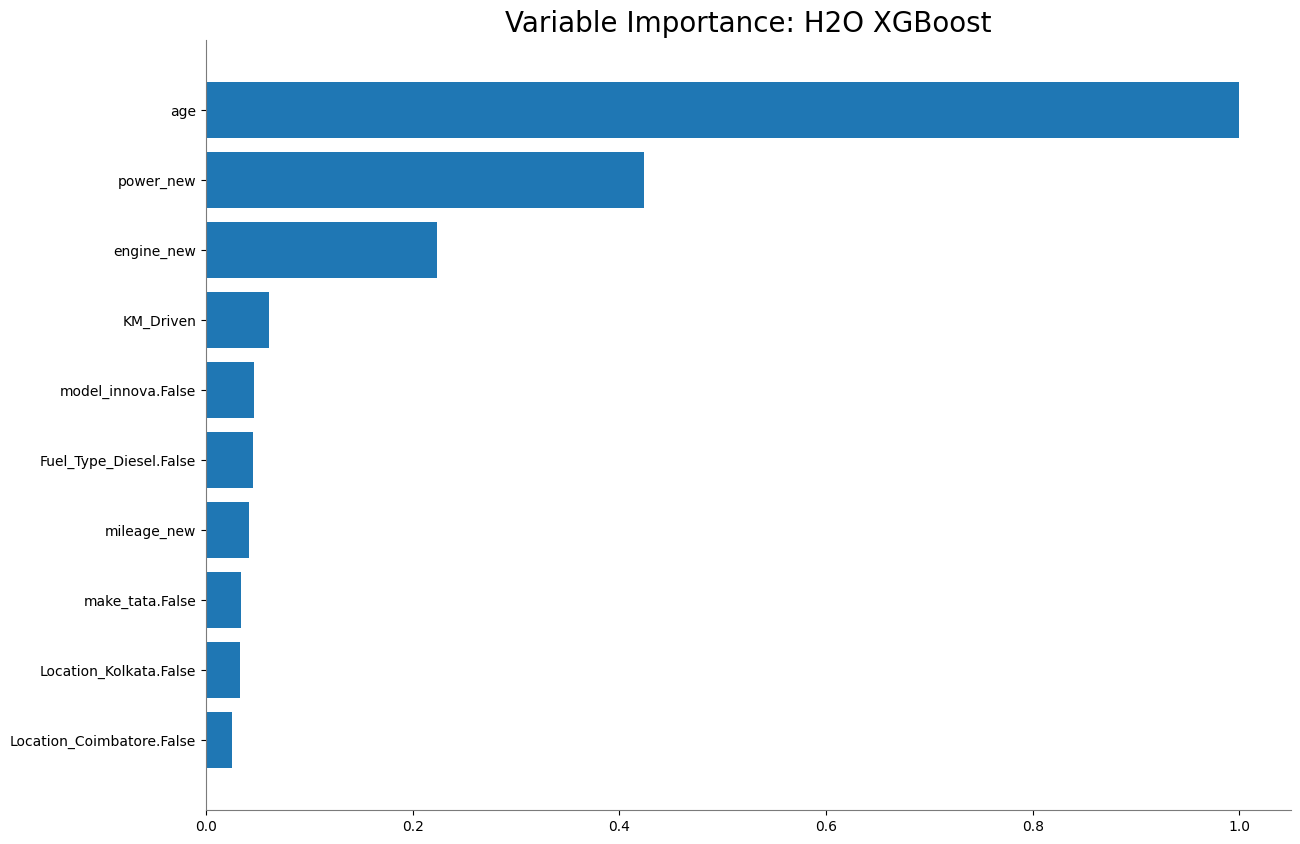

<Figure size 640x480 with 0 Axes>

In [39]:
xgb_model.varimp_plot()

## Random Forest

In [40]:
rf_model = h2o.get_model("DRF_1_AutoML_1_20241114_62049")

In [41]:
rf_model.actual_params

{'model_id': 'DRF_1_AutoML_1_20241114_62049',
 'training_frame': 'AutoML_1_20241114_62049_training_Key_Frame__upload_86ace81f977f3a1afac019c0d17944f7.hex',
 'validation_frame': None,
 'nfolds': 5,
 'keep_cross_validation_models': False,
 'keep_cross_validation_predictions': True,
 'keep_cross_validation_fold_assignment': False,
 'score_each_iteration': False,
 'score_tree_interval': 5,
 'fold_assignment': 'Modulo',
 'fold_column': None,
 'response_column': 'Price',
 'ignored_columns': [],
 'ignore_const_cols': True,
 'offset_column': None,
 'weights_column': None,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'ntrees': 49,
 'max_depth': 20,
 'min_rows': 1.0,
 'nbins': 20,
 'nbins_top_level': 1024,
 'nbins_cats': 1024,
 'r2_stopping': 1.7976931348623157e+308,
 'stopping_rounds': 0,
 'stopping_metric': 'MSE',
 'stopping_tolerance': 0.020108882748332158,
 'max_runtime_secs': 0.0,
 'seed': 4,
 'build_tree_one_

## Retriving details of the stacked ensembles

In [42]:
# Get the "All Models" Stacked Ensemble model
stacked_model = h2o.get_model("StackedEnsemble_AllModels_1_AutoML_1_20241114_62049")

In [43]:
stacked_model

key,value
Stacking strategy,cross_validation
Number of base models (used / total),8/10
# GBM base models (used / total),4/5
# XGBoost base models (used / total),3/3
# DRF base models (used / total),1/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


In [44]:
metalearner = h2o.get_model(stacked_model.metalearner()['name'])

/usr/local/lib/python3.10/dist-packages/h2o/estimators/stackedensemble.py:965: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


In [45]:
metalearner

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: metalearner_AUTO_StackedEnsemble_AllModels_1_AutoML_1_20241114_62049


GLM Model: summary
    family    link      regularization                                lambda_search                                                                  number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  -----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ---------------------------------------------------------------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.01134 )  nlambda = 100, lambda.max = 8.3824, lambda.min = 0.01134, lambda.1se = 0.3545  10                            8                              72                      levelone_training_StackedEnsemble_AllModels_1_AutoML_1_20241114_62049

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.36123068607334236
RMSE: 0.6010246967249702
MAE: 0.42775001107304383
RMSLE: 0.10907284769929514
Mean Residual Deviance: 0.36123068607334236
R^2: 0.9214589378739927
Null degrees of freedom: 2472
Residual degrees of freedom: 2464
Null deviance: 11373.967482464495
Residual deviance: 893.3234866593757
AIC: 4519.966162015155

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.36443081176248043
RMSE: 0.6036810513528484
MAE: 0.42953538878277064
RMSLE: 0.10956220321581624
Mean Residual Deviance: 0.36443081176248043
R^2: 0.9207631462919096
Null degrees of freedom: 2472
Residual degrees of freedom: 2466
Null deviance: 11380.572326775302
Residual deviance: 901.2373974886141
AIC: 4537.777880442046

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     921.586   51.8252     918.316       855.778       888.503       979.331       966.005
loglikelihood           0         0           0             0             0             0             0
mae                     0.429828  0.0191746   0.410426      0.418183      0.419865      0.447301      0.453366
mean_residual_deviance  0.364959  0.0469715   0.34301       0.313609      0.3383        0.414723      0.415154
mse                     0.364959  0.0469715   0.34301       0.313609      0.3383        0.414723      0.415154
null_deviance           2276.11   153.007     2342.54       2268.06       2234.54       2058.8        2476.64
r2                      0.920343  0.0114519   0.925506      0.931075      0.925191      0.901482      0.918463
residual_deviance       180.271   20.8915     173.906       156.177       167.12        202.799       201.35
rmse                    0.603126  0.0387068   0.585671      0.560008      0.581635      0.64399       0.644325
rmsle                   0.109227  0.00534688  0.106565      0.102651      0.108863      0.11701       0.111046

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train       deviance_xval        deviance_se           alpha    iterations    training_rmse       training_deviance    training_mae         training_r2
---  -------------------  ----------  -----------  --------  ------------  -------------------  -------------------  --------------------  -------  ------------  ------------------  -------------------  -------------------  ------------------
     2024-11-14 06:24:40  0.000 sec   1            .84E1     1             4.599259044015884    4.602955200106947    0.14435733822367594   0.5
     2024-11-14 06:24:40  0.000 sec   2            .76E1     8             4.01223926140719     4.600294816351741    0.14347327371879576   0.5
     2024-11-1